In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

QUESTÃO 1

In [39]:
massa_muscular_idade = pd.read_csv('../DataSet/massa_muscular_x_idade.csv')
massa_muscular_idade.head()

,Massa_muscular_Y,Idade_X
0,82.0,71.0
1,91.0,64.0
2,100.0,43.0
3,68.0,67.0
4,87.0,56.0


(a)

In [40]:
massa_muscular_idade.columns

Index(['Massa_muscular_Y', ' Idade_X'], dtype='object')

In [41]:
x = massa_muscular_idade[' Idade_X'].values
y = massa_muscular_idade['Massa_muscular_Y'].values

In [42]:
beta1, beta0 = np.polyfit(x, y, 1)
print('Coeficiente angular: {:.2f}'.format(beta1))
print('Coeficiente linear: {:.2f}'.format(beta0))

Coeficiente angular: -1.03
Coeficiente linear: 148.20


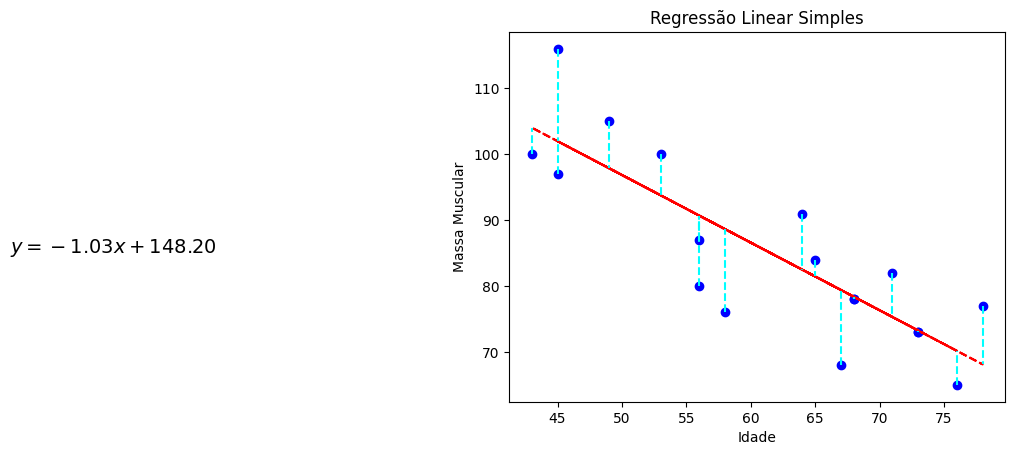

In [43]:
formula = r'$y = {:.2f}x + {:.2f}$'.format(beta1, beta0)

plt.scatter(x, y, color='blue')
plt.plot(x, beta1*x+beta0, '--', color='red')

y_pred = beta1*x + beta0
residuos = y - y_pred

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], '--', color='cyan')

plt.title('Regressão Linear Simples')
plt.xlabel('Idade')
plt.ylabel('Massa Muscular')
plt.text(2.5, 85, formula, fontsize=14, color='black')
plt.show()

(b)

In [44]:
idade = 50
massa_muscular = beta1 * idade + beta0

print('Massa muscular média estimada para mulheres com 50 anos: {:.2f}'.format(massa_muscular))

Massa muscular média estimada para mulheres com 50 anos: 96.86


QUESTÃO 2

In [45]:
renda_familia_alimentacao = pd.read_csv('../DataSet/renda_familia_alimentacao.csv')
renda_familia_alimentacao.head()

,Renda_Familiar_X,Gasto_Alimentacao_Y
0,3,1.5
1,5,2.0
2,10,6.0
3,10,7.0
4,20,10.0


(a)

In [46]:
renda_familia_alimentacao.columns

Index(['Renda_Familiar_X', ' Gasto_Alimentacao_Y'], dtype='object')

In [47]:
x = renda_familia_alimentacao['Renda_Familiar_X'].values
y = renda_familia_alimentacao[' Gasto_Alimentacao_Y'].values

In [48]:
beta1, beta0 = np.polyfit(x,y,1)
print(f"Gasto com alimentação = {beta1:.2f} * Renda familiar + {beta0:.2f}")

Gasto com alimentação = 0.26 * Renda familiar + 5.40


(b)

A inclinação da reta de regressão do item (a) é 0.26, o que significa que, para cada unidade monetária adicional de renda familiar, espera-se que o gasto com alimentação aumente em média 0.26 unidades monetárias. Isso indica que existe uma relação positiva entre a renda familiar e o gasto com alimentação, ou seja, à medida que a renda aumenta, espera-se que o gasto com alimentação também aumente.

(c)

In [49]:
rendas = [55, 90, 250, 300, 450]

for renda in rendas:
    gasto_estimado = beta1*renda + beta0
    print(f"Gasto estimado para a renda {renda}: {gasto_estimado:.2f}")

Gasto estimado para a renda 55: 19.47
Gasto estimado para a renda 90: 28.42
Gasto estimado para a renda 250: 69.34
Gasto estimado para a renda 300: 82.13
Gasto estimado para a renda 450: 120.50


QUESTÃO 4

In [50]:
erros_horas_sem_dormir = pd.read_csv('../DataSet/no_erros_horas_sem_dormir.csv')
erros_horas_sem_dormir.head()

,No_Errors_Y,No_Horas_Sem_Dormir_X
0,6,8
1,8,8
2,6,12
3,10,12
4,8,16


(a)

In [51]:
x = erros_horas_sem_dormir[' No_Horas_Sem_Dormir_X'].values
y = erros_horas_sem_dormir['No_Errors_Y'].values
x = x.reshape((-1,1))

In [52]:
model = LinearRegression()
model.fit(x,y)
print('numero_erros = {:.2f} * numero_horas_sem_dormir + {:.2f}'.format(model.coef_[0], model.intercept_))

numero_erros = 0.47 * numero_horas_sem_dormir + 3.00


(b)

In [53]:
numero_horas = [2, 6, 18, 25, 30]

for hora in numero_horas:
    numero_estimado = beta1*hora + beta0
    print(f"Número estimado de erros para pessoas que ficaram {hora} horas sem dormir: {numero_estimado:.2f}")

Número estimado de erros para pessoas que ficaram 2 horas sem dormir: 5.91
Número estimado de erros para pessoas que ficaram 6 horas sem dormir: 6.94
Número estimado de erros para pessoas que ficaram 18 horas sem dormir: 10.00
Número estimado de erros para pessoas que ficaram 25 horas sem dormir: 11.79
Número estimado de erros para pessoas que ficaram 30 horas sem dormir: 13.07


QUESTÃO 5

In [54]:
faturamento_publicidade = pd.read_csv('../DataSet/faturamento_por_publicidade.csv', error_bad_lines=False)
faturamento_publicidade.head()

C:\Users\luana\AppData\Local\Temp\ipykernel_10704\1486369994.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  faturamento_publicidade = pd.read_csv('../DataSet/faturamento_por_publicidade.csv', error_bad_lines=False)
Skipping line 8: expected 3 fields, saw 4



,faturamento_bruto_Y,anuncio_tv,anuncio_jornal
0,96,5.0,1.5
1,90,2.0,2.0
2,95,4.0,1.5
3,92,2.5,2.5
4,95,3.0,3.3


(1)

In [55]:
x = faturamento_publicidade.drop('faturamento_bruto_Y', axis=1)
y = faturamento_publicidade['faturamento_bruto_Y']

In [56]:
model = LinearRegression().fit(x, y)
print("Intercepto: {:.2f}".format(model.intercept_))
print("Coeficientes: {:.2f}".format(model.coef_[0]))
print("R²: {:.2f}".format(model.score(x, y)))

Intercepto: 82.06
Coeficientes: 2.38
R²: 0.94


(c) = 83.23 + 2.29 + 1.30 2 = 0.92

O R² é a métrica que representa a proporção da variância na variavel dependente, varia-se entre 0 e 1 e quanto mais próximo de 1, melhor o ajuste do modelo. Então o modelo (c) é o escolhido, apresentando aproximadamente 92%.

(2)

In [57]:
x_new = [[3500, 1800]]
y_predict = model.predict(x_new)
print("Faturamento bruto previsto: {:.2f}".format(y_predict[0]))

Faturamento bruto previsto: 11508.73


c:\Users\luana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


QUESTÃO 6

In [58]:
custo_distribuicao_vendas = pd.read_csv('../DataSet/custo_distribuicao_vendas_pedidos.csv')
custo_distribuicao_vendas.head()

,mes,y,x1,x2
0,1,52.95,386,4.015
1,2,71.66,446,3.806
2,3,85.56,512,5.309
3,4,63.69,401,4.262
4,5,72.81,457,4.296


In [59]:
x = custo_distribuicao_vendas[['x1', 'x2']]
y = custo_distribuicao_vendas['y']

In [60]:
model = LinearRegression().fit(x,y)
print('Coeficientes: {:.2f}'.format(model.coef_[0]))
print('Intercepto: {:.2f}'.format(model.intercept_))

Coeficientes: 0.04
Intercepto: -9.81


QUESTÃO 7

In [74]:
behavior = pd.read_csv('../DataSet/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv', sep=';', decimal=',')
behavior.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [75]:
x = behavior.drop('Slowness in traffic (%)', axis=1)
y = behavior['Slowness in traffic (%)']

model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

In [77]:
print(f'Intercepto: {model.intercept_:.2f}')
for i, variable in enumerate(behavior.drop('Slowness in traffic (%)', axis=1)):
    print(f'Coeficiente ({variable}): {model.coef_[i]:.2f}')

Intercepto: 4.90
Coeficiente (Hour (Coded)): 0.34
Coeficiente (Immobilized bus): 0.29
Coeficiente (Broken Truck): -0.08
Coeficiente (Vehicle excess): 0.67
Coeficiente (Accident victim): -0.15
Coeficiente (Running over): 0.13
Coeficiente (Fire vehicles): 3.38
Coeficiente (Occurrence involving freight): -1.17
Coeficiente (Incident involving dangerous freight): -1.10
Coeficiente (Lack of electricity): 1.54
Coeficiente (Fire): -0.50
Coeficiente (Point of flooding): 1.18
Coeficiente (Manifestations): 1.61
Coeficiente (Defect in the network of trolleybuses): -0.32
Coeficiente (Tree on the road): -0.52
Coeficiente (Semaphore off): 0.85
Coeficiente (Intermittent Semaphore): -0.45


In [78]:
rmse = mean_squared_error(y, y_pred, squared=False)
rse = mean_squared_error(y, y_pred, squared=True)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Resultados
print('RMSE:', round(rmse, 2))
print('RSE:', round(rse, 2))
print('MAE:', round(mae, 2))
print('R2:', round(r2, 2))

print(f'A estimada a porcentagem de lentidão no trânsito é de {y_pred[0]:.1f}%.')

RMSE: 2.54
RSE: 6.47
MAE: 1.93
R2: 0.66
A estimada a porcentagem de lentidão no trânsito é de 5.2%.


QUESTÃO 8

In [65]:
cicle_power_plants = pd.read_excel('../DataSet/Folds5x2_pp.xlsx')
cicle_power_plants.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [66]:
x = cicle_power_plants.drop('PE', axis=1)
y = cicle_power_plants['PE']

model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

In [67]:
print(f'Intercepto: {model.intercept_:.2f}')
for i, variable in enumerate(cicle_power_plants.drop('PE', axis=1)):
    print(f'Coeficiente ({variable}): {model.coef_[i]:.2f}')

Intercepto: 454.61
Coeficiente (AT): -1.98
Coeficiente (V): -0.23
Coeficiente (AP): 0.06
Coeficiente (RH): -0.16


In [68]:
rmse = mean_squared_error(y, y_pred, squared=False)
rse = mean_squared_error(y, y_pred, squared=True)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Resultados
print('RMSE:', round(rmse, 2))
print('RSE:', round(rse, 2))
print('MAE:', round(mae, 2))
print('R2:', round(r2, 2))

print(f'A estimada saída de energia elétrica horária líquida é {y_pred[0]:.2f} MW.')

RMSE: 4.56
RSE: 20.77
MAE: 3.63
R2: 0.93
A estimada saída de energia elétrica horária líquida é 467.27 MW.


Baseado no valor de R² a qualidade do modelo é boa.

QUESTÃO 9

In [69]:
concrete = pd.read_csv('../DataSet/Concrete_Data_Yeh.csv')
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [70]:
x = concrete.drop('csMPa', axis=1)
y = concrete['csMPa']

In [71]:
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

In [72]:
print(f'Intercept: {model.intercept_:.2f}')
for i, variable in enumerate(concrete.drop('csMPa', axis=1)):
    print(f'Coeficiente ({variable}): {model.coef_[i]:.2f}')

Intercept: -23.33
Coeficiente (cement): 0.12
Coeficiente (slag): 0.10
Coeficiente (flyash): 0.09
Coeficiente (water): -0.15
Coeficiente (superplasticizer): 0.29
Coeficiente (coarseaggregate): 0.02
Coeficiente (fineaggregate): 0.02
Coeficiente (age): 0.11


In [73]:
rmse = mean_squared_error(y, y_pred, squared=False)
rse = mean_squared_error(y, y_pred, squared=True)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Resultados
print('RMSE:', round(rmse, 2))
print('RSE:', round(rse, 2))
print('MAE:', round(mae, 2))
print('R2:', round(r2, 2))

RMSE: 10.35
RSE: 107.2
MAE: 8.21
R2: 0.62


QUESTÃO 10